In [6]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'

In [7]:
dz = 9060               # vertical distance 

# code for numerically solving slant range s for each turn angle \theta 
t_f = 43                # bomb's time of flight (sec)
g   = 9.8               # acceleration of gravity (m/s^2)
v0  = 328 * 1.6 / 3.6   # bomb's speed (mi/h -> m/s)
v   = 350 * 1.6 / 3.6   # Enola Gay's max speed (mi/h -> m/s)
v_s = 360               # shockwave speed, slightly over the speed of sound (m/s)

def f(s):
    return s - np.sqrt((v0*t_f - R*np.sin(theta) - (v*t_f-R*theta+v*s/v_s)*np.cos(theta))**2 +\
                        (R*(1-np.cos(theta)) + (v*t_f-R*theta+v*s/v_s)*np.sin(theta))**2 + dz**2)

R = v**2 / (g * np.tan(np.deg2rad(60)))

# numerically solve for each value of \theta in [0, 180]
# in steps of 0.3 deg
slant_range, angle = [], []
for theta_deg in range(0, 3*(180)+1):
    angle.append(theta_deg/3)
    theta = np.deg2rad(theta_deg/3)
    slant_range.append(fsolve(f, x0=10e3)[0]* 1e-3)

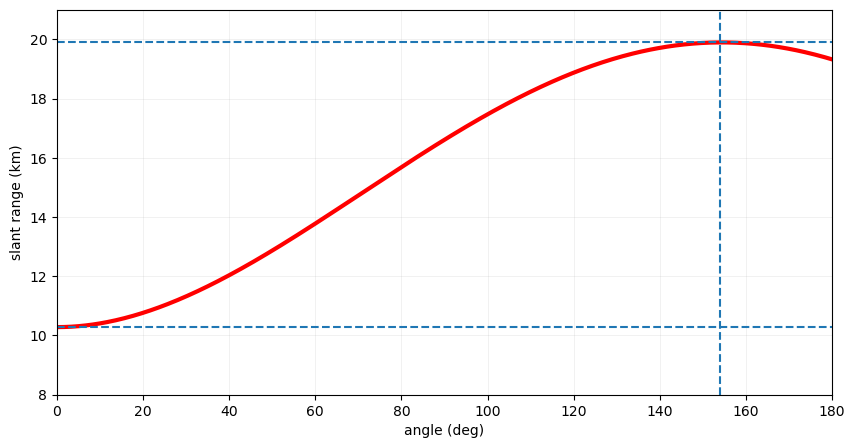

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(angle, slant_range, lw=3, color='r')
ax.grid(zorder=0, alpha=0.25, lw=0.5)
ax.axhline(y=10.3, ls='--')
ax.axvline(x=154, ls='--')
ax.axhline(y=19.9, ls='--')
ax.set(xlabel='angle (deg)', ylabel='slant range (km)', xlim=[0, 180], ylim=[8, 21]);